<a href="https://colab.research.google.com/github/sanhiitaa/100-days-of-deep-learning/blob/main/transfer_learning_feature_extraction_WITH_data_augmentation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# downloading the dataset
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:52<00:00, 22.0MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [5]:
# extracting the convolution layers from the VGG16  model
conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

58889256/58889256 [==============================] - 3s 0us/step


In [6]:
conv_base.trainable=False

In [7]:
# creating a sequential model with pre-trained CNN layers and defining FC layers
model= Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
# generators
batchsize=32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.3,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory('/content/train',
                                                    target_size=(150,150),
                                                    batch_size=batchsize,
                                                    class_mode='binary')

test_datagen= ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory('/content/test',
                                                        target_size=(150,150),
                                                        batch_size=batchsize,
                                                        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
# fitting the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
625/625 [==============================] - 192s 295ms/step - loss: 0.3547 - accuracy: 0.8459 - val_loss: 0.2282 - val_accuracy: 0.9056
Epoch 2/10
625/625 [==============================] - 167s 267ms/step - loss: 0.2834 - accuracy: 0.8763 - val_loss: 0.2266 - val_accuracy: 0.9022
Epoch 3/10
625/625 [==============================] - 163s 261ms/step - loss: 0.2619 - accuracy: 0.8866 - val_loss: 0.2045 - val_accuracy: 0.9110
Epoch 4/10
625/625 [==============================] - 163s 261ms/step - loss: 0.2579 - accuracy: 0.8874 - val_loss: 0.2220 - val_accuracy: 0.9048
Epoch 5/10
625/625 [==============================] - 175s 280ms/step - loss: 0.2471 - accuracy: 0.8930 - val_loss: 0.2048 - val_accuracy: 0.9150
Epoch 6/10
625/625 [==============================] - 164s 263ms/step - loss: 0.2400 - accuracy: 0.8970 - val_loss: 0.1934 - val_accuracy: 0.9172
Epoch 7/10
625/625 [==============================] - 163s 261ms/step - loss: 0.2360 - accuracy: 0.8980 - val_loss: 0.2177 -

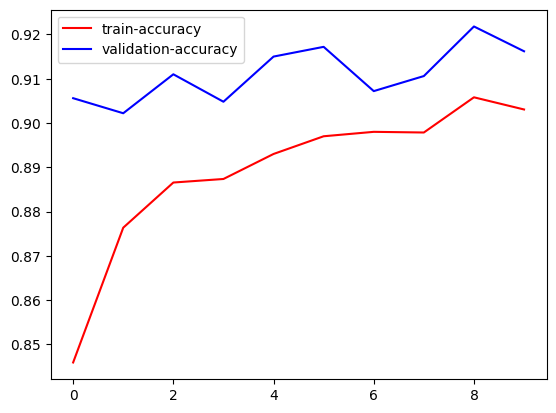

In [13]:
# plotting graphs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train-accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation-accuracy')
plt.legend()
plt.show()

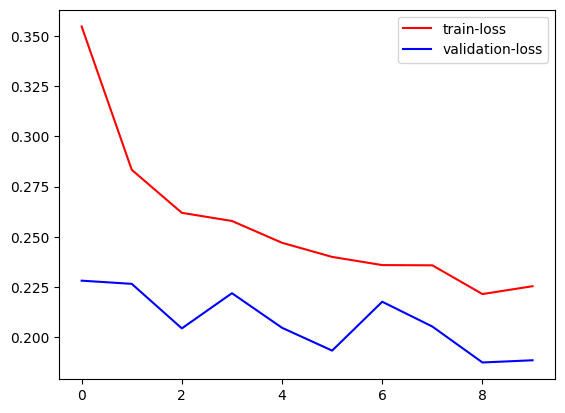

In [14]:
plt.plot(history.history['loss'],color='red',label='train-loss')
plt.plot(history.history['val_loss'],color='blue',label='validation-loss')
plt.legend()
plt.show()

A slightly higher validation accuracy relative to training accuracy suggests that model seems to be generalizing better with data augmentation.

